<a href="https://colab.research.google.com/github/PulakAgarwal/Python-Visualization-for-Data-Science-Introduction-2020/blob/main/Python_for_data_science_Youtube_Data_filled_in.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python for Data Science

    During this workshop we will give an intro to: 
    Reading in a dataset using Pandas
    Data manupulation using Pandas
    Inroduction/conversion to numpy
    simple visualizations. 

We will be using Google Collab for this. 

Data source: https://www.kaggle.com/datasnaek/youtube-new?select=CAvideos.csv

In [ ]:
# in case your Collab environment or even local environment returns a ModuleNotFoundError, 
# run this cell to install all the libraries we will use today.

!pip install numpy pandas seaborn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print (sns.__version__)
print (pd.__version__)
print (np.version.version)

0.11.2
1.3.5
1.21.5


Numpy and Pandas are the premiere data manipulation packages for python.
The purpose of Pandas is because it brings in the functionality of a dataframe.
This gives us a fast way to work with relational, or labeled data.
Let us look at how the basis of pandas works.

        Note: even though I will be mainly using Pandas for this exercise
        Pandas is actually built on top of Numpy, meaning a vast majority of 
        the functions we will be covering, can be used just as easily in numpy.
        
To explain the differences between the two:
            
        Numpy is used for creating Arrays - These arrays can be any number of dimensions, but 
        they do not have column or index labels - Numpy is essentially a more efficient version
        of the List in Python.
        Pandas is used for dataframes - This is more organized data that has column names AND an
        index.  It is Numpy with a more mandatory structure.

## Import data

In [16]:
# the first way to upload file is by using files function of Google Colab and upload it from your device

from google.colab import files
uploaded = files.upload()
fp = open("Youtube_CAvideos_clean.csv","r") 


Saving Youtube_CAvideos_clean.csv to Youtube_CAvideos_clean.csv


In [17]:

df = pd.read_csv(fp)
df
#as we can see below, we have a dataframe, we have labeled columns, and numbered rows.  
#This will allow us to quickly isolate rows or columns and perform operations on them quickly 

,trending_date,title,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,17158579,787425,43420,125882,False,False,False
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,1014651,127794,1688,13030,False,False,False
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,3191434,146035,5339,8181,False,False,False
3,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2095828,132239,1989,17518,False,False,False
4,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,33523622,1634130,21082,85067,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
40876,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,80685,1701,99,1312,False,False,False
40877,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,103339,460,66,51,False,False,False
40878,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,773347,25900,224,3881,False,False,False
40879,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,115225,2115,182,1672,False,False,False


In [18]:
# type live
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trending_date           40881 non-null  object
 1   title                   40881 non-null  object
 2   channel_title           40881 non-null  object
 3   category_id             40881 non-null  int64 
 4   views                   40881 non-null  int64 
 5   likes                   40881 non-null  int64 
 6   dislikes                40881 non-null  int64 
 7   comment_count           40881 non-null  int64 
 8   comments_disabled       40881 non-null  bool  
 9   ratings_disabled        40881 non-null  bool  
 10  video_error_or_removed  40881 non-null  bool  
dtypes: bool(3), int64(5), object(3)
memory usage: 2.6+ MB


## Clean / Format the data

### Shrink down the data with selected columns

In [19]:
# trim off columns we are not going to use for this workshop
df_simp = df[["channel_title", "category_id", "views", "likes", "dislikes", "comment_count","comments_disabled","ratings_disabled"]]

# type live
df_simp["category_id"] = df_simp["category_id"].apply(str)
df_simp

print (df_simp.dtypes)

channel_title        object
category_id          object
views                 int64
likes                 int64
dislikes              int64
comment_count         int64
comments_disabled      bool
ratings_disabled       bool
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Check values in columns and clean the messy data

The first manipulation we would want to make is only select columns we may want to work with, and ignore columns we do not. 

### Sort the data by categories

In [20]:
df_sort = df_simp.sort_values(["views", "likes", "dislikes", "comment_count"], ascending=[False, False,False,False])
df_sort
#To make our data is more viewable, we will use the function dataframe.sort_values
#With this, we can first sort by the numbers of views, then sort by likes
#To sort from the greatest to the least, by setting ascending = to false!

#look how readable our results are!

,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
5900,YouTube Spotlight,24,137843120,3014479,1602383,817582,False,False
5623,YouTube Spotlight,24,125431369,2912715,1545018,807558,False,False
5398,YouTube Spotlight,24,113876217,2811217,1470387,787174,False,False
5197,YouTube Spotlight,24,100911567,2656678,1353655,682890,False,False
34361,ChildishGambinoVEVO,10,98938809,3037318,161813,319502,False,False
...,...,...,...,...,...,...,...,...
579,udearroba,27,1141,0,0,0,False,False
20505,mart lat,24,1107,14,1,3,False,False
18076,Toronto Raptors,17,1023,65,5,23,False,False
18045,The National,25,1000,46,19,0,True,False


## Basic Statistical Analysis 

Overview of statistics of the whole dataset.

In [21]:
#Finally, what if before all colorful graphs, we want to know the statistical aspects about our data?
#Pandas again, comes to the rescue and makes it fairly simple to collect numbers
# type live
# all_stats = df_sort.describe()
# df_sort.describe()

#As you can see, this aggregates all of our car data, and tells us about it in general.
#What if we want to drilldown by a specific category?  

Compare the overall statistical distribution to a subset of data.

In [22]:
#let's review the categories and see what we got here.
categories = df_sort.category_id.unique()
print (categories)
    
a =df_sort["category_id"].value_counts()
print (a)

['24' '10' '22' '28' '26' '1' '17' '29' '20' '23' '27' '25' '2' '15' '30'
 '19' '43']
24    13451
25     4159
22     4105
23     3773
10     3731
17     2787
1      2060
26     2007
20     1344
28     1155
27      991
19      392
15      369
2       353
43      124
29       74
30        6
Name: category_id, dtype: int64


Create a subcategory of the dataset.

In [23]:
#let's select a subcategory to focus on
# type live
cat_24 = df_sort[df_sort["category_id"]=="24"]
# print (cat_24)

# Or, we can create a sub-dataset with a few categories to work on.
cat_list=["24","28","17","10"]
cats =df_sort.loc[df_sort["category_id"].isin(cat_list)]
# print (cats)

In [24]:
#Lets look at Category 24 statistics to further analyze their data
cat_24_stats= cat_24.describe()
cat_24_stats
#This is cool and all, but I need something to compare it to!

,views,likes,dislikes,comment_count
count,1.345100e+04,1.345100e+04,1.345100e+04,13451.000000
mean,1.016372e+06,2.878934e+04,1.917447e+03,4112.187644
std,3.706464e+06,1.083120e+05,2.933067e+04,20807.588180
min,7.330000e+02,0.000000e+00,0.000000e+00,0.000000
25%,1.465485e+05,1.869000e+03,9.000000e+01,320.000000
50%,3.461660e+05,6.208000e+03,2.600000e+02,1038.000000
75%,8.257125e+05,1.970350e+04,7.605000e+02,2931.000000
max,1.378431e+08,3.014479e+06,1.602383e+06,827755.000000


In [25]:
#So say we want to further analyze the data by figuring out how cat_24 compares to all categories
#In Pandas, if 2 dataframes or columns match, pandas will automatically just subtract each one in order

stat_differential = cat_24_stats - all_stats

#Since the means will tell us the most, let us select the mean column and print it!
# print(stat_differential.loc["mean"])
stat_differential
print(stat_differential.loc["mean"])

NameError: ignored

Now we are going to move into Visualizing and Analyzing our data!

    for this, we will be using a relatively new data vizualization package called Seaborn
    If you are familiar with Matplotlib, it is similar and based on Matplotlib. 
    The difference is something that takes 10 lines in matplotlib, can be done in 1 with seaborn, 
    making it ideal for super quick and easy visualizations. In fact, it actually inherits a lot of 
    what it does from matplotlib. For example, in order to change the title, we will be calling a 
    matplotlib function, not a seaborn one!  
    
    To make it even better, its built to work with Pandas!
    Lets look at the example below to see how we can make a plot with a line of best fit
     

     

## Visualization

In [26]:
#give an outline or plan for viz types
for col in cats:
    print (col)

channel_title
category_id
views
likes
dislikes
comment_count
comments_disabled
ratings_disabled


Text(0.5, 1.0, 'Youtube Videos Views vs. Comment Counts')

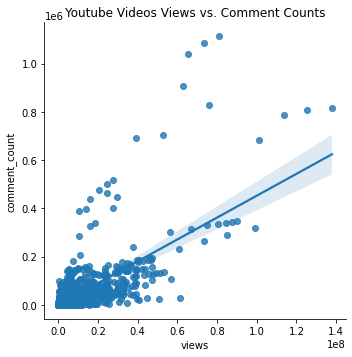

In [27]:
#so we renamed seaborn as sns.  Now let is call sns.lmplot, which stands for linear model plot
#It will include both our X and Y scatterplot, and automatically 

#type live
# talk about what data you need to make a scatterplot - x, y, data
sns.lmplot(x="views", y="comment_count",  data=cats)  
plt.title('Youtube Videos Views vs. Comment Counts') 



#As you can see, we created a beautiful viz with only 1 line of code, and needed   
# one more to add a title!  That is powerful.

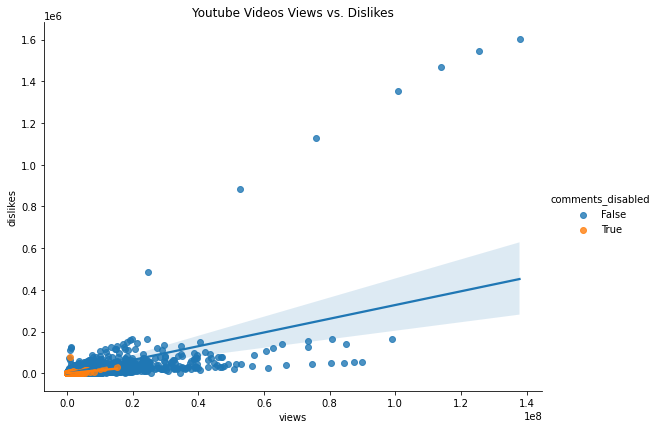

In [28]:
#Seaborn's custemization features
#Let's see how it can define colors of the variables and resize the charts.

g = sns.lmplot(x="views", y="dislikes", data=cats, legend="full", hue="comments_disabled", height=6, aspect=1.3, )  
plt.title('Youtube Videos Views vs. Dislikes')

#In addition, lets learn how to save this graph!
g.savefig('Test.png')

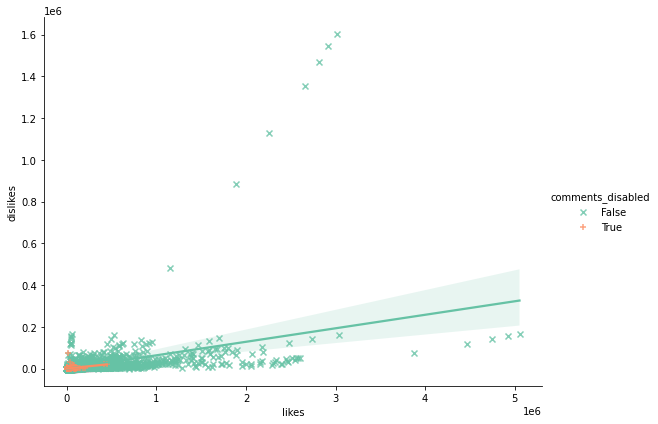

In [29]:
# On top of that, Seaborn can also assign markers and apply new palette to the charts.

sns.lmplot(x="likes", y="dislikes", hue="comments_disabled", data=cats, markers=["x", "+"], palette="Set2", height=6, aspect=1.3)

### Categorical scatterplots

* `catplot()`
* `stripplot()`
* `swarmplot()`

In [30]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21124 entries, 5900 to 34625
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   channel_title      21124 non-null  object
 1   category_id        21124 non-null  object
 2   views              21124 non-null  int64 
 3   likes              21124 non-null  int64 
 4   dislikes           21124 non-null  int64 
 5   comment_count      21124 non-null  int64 
 6   comments_disabled  21124 non-null  bool  
 7   ratings_disabled   21124 non-null  bool  
dtypes: bool(2), int64(4), object(2)
memory usage: 1.2+ MB


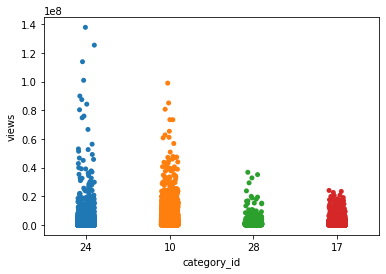

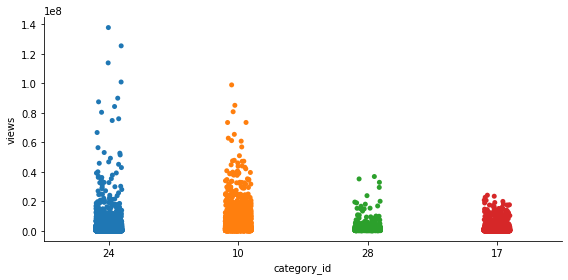

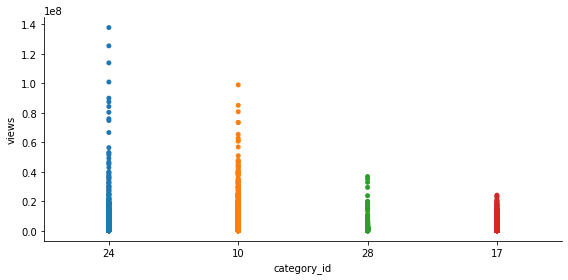

In [31]:
#The default “kind” in catplot() is stripplot().
#It is to adjust the positions of points on the categorical axis with a small amount of random “jitter”:
# live coding
sns.stripplot(x="category_id", y="views", data=cats)
sns.catplot(x="category_id", y="views", data=cats, height=4, aspect=2) # Standard Strip Plot

#If you wish to remove the jitter effect, just set jitter function as False.
sns.catplot(x="category_id", y="views",jitter=False, data=cats, height=4, aspect=2) # Removes random X-axis noise

The second approach, the swarmplot(), uses algorithm to avoid data points from overlapping each other.

For this approach you cannot have too large of a dataset tho, as there may not be enough space to show 
all of them.

Below we create a subset of of cats dataset to demonstrate.

In [32]:
df_swarm=cats.head(1000)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 76.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 72.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 49.0% of the points cannot be placed; y

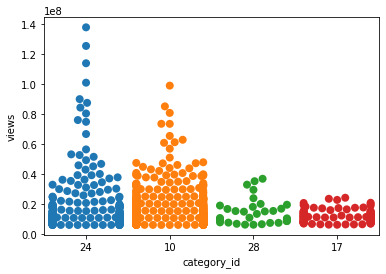

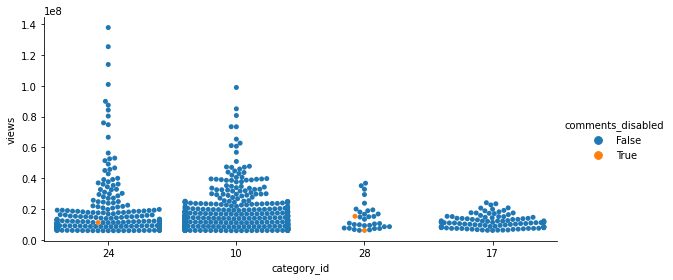

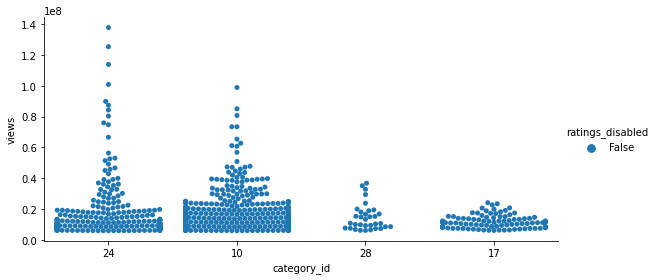

In [33]:
sns.swarmplot(x="category_id", y="views", data=df_swarm, size=8)

sns.catplot(x="category_id", y="views", kind="swarm",hue="comments_disabled", data=df_swarm, height=4, aspect=2) # Swarm Plot
sns.catplot(x="category_id", y="views", kind="swarm",hue="ratings_disabled", data=df_swarm, height=4, aspect=2) # Recolors to add a new dimension

### Categorical distribution plots

* `boxplot()`
* `violinplot()`
* `boxenplot()`

In [34]:
df_cat = cats[:700]
# df_cat['polar_ratio'] = df_cat['dislikes']/df_cat['likes'] 
df_cat = df_cat[df_cat["comments_disabled"]==False]

df_cat.head(5)

,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
5900,YouTube Spotlight,24,137843120,3014479,1602383,817582,False,False
5623,YouTube Spotlight,24,125431369,2912715,1545018,807558,False,False
5398,YouTube Spotlight,24,113876217,2811217,1470387,787174,False,False
5197,YouTube Spotlight,24,100911567,2656678,1353655,682890,False,False
34361,ChildishGambinoVEVO,10,98938809,3037318,161813,319502,False,False


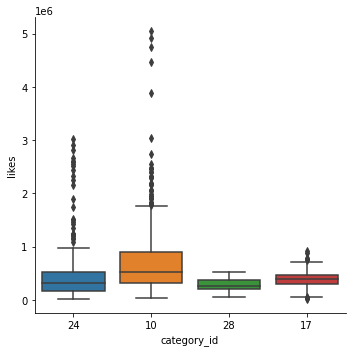

In [44]:
sns.catplot(x="category_id", y="likes", kind="box", data=df_cat)
# sns.stripplot(x="category_id", y="views", data=df_cat, alpha=0.2,jitter=0.1,color='k')


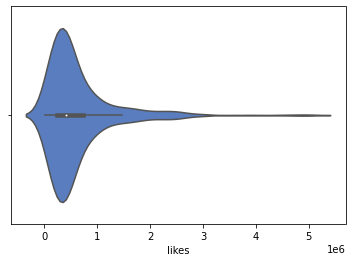

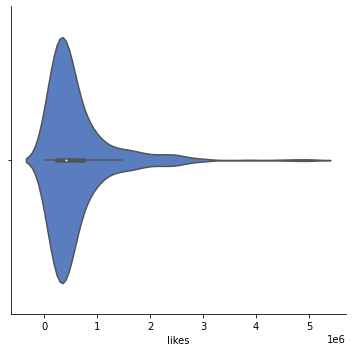

In [36]:
sns.violinplot(x="likes", palette="muted", data=df_cat)
sns.catplot(x="likes", palette="muted", kind="violin", data=df_cat)
# sns.catplot(x="likes", y="category_id",  kind="violin",  split=True, inner="stick", data=df_cat)

## Categorical estimate Plots
* `pointplot()`
* `barplot()`
* `countplot()`

A bar plot represents an estimate of data tendency.
The height of each rectangle represents the central tendency for a numeric variable.
The black bar on top provides some indication of the uncertainty around that estimate using error bars.

barplots and countplots are simpler ways of implementing the same functions as a bar catplot, 
what you need (control vs simlicity) determines which one you pick.

In [37]:
# sns.catplot(x="category_id", kind="swarm", palette="ch:.25", data=cats, height=4, aspect=2) #hue="",

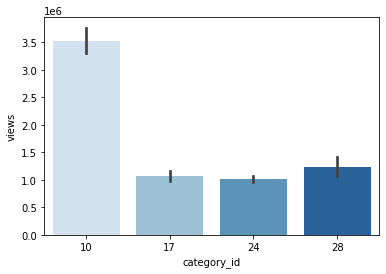

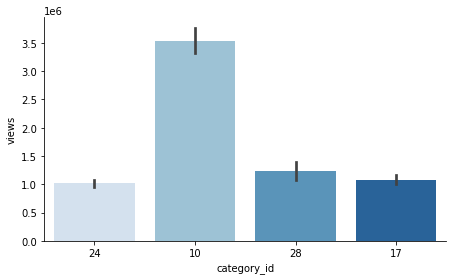

In [48]:
sns.barplot(x="category_id", y="views", order=["10","17","24", "28"], data=cats, palette="Blues")
sns.catplot(x="category_id", y="views", kind="bar", data=cats, height=4, aspect=1.6, palette="Blues")

# by default these black lines represent our confidence interfval, which we can remove with "ci=None".
# the default uses the standard deviation

## Regressions

Two main functions in seaborn to visualize a linear relationship as determined through regression are regplot() and lmplot(). They share much of  core functionality: both plots draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression.

Differences: 
1. regplot() accepts the x and y variables in a variety of formats, lmplot() has data as a required parameter and the x and y variables must be specified as strings
2. While regplot() always shows a single relationship, lmplot() combines regplot() with FacetGrid to show a linear regression on “faceted” plots that allow you to explore interactions with up to three additional categorical variables.

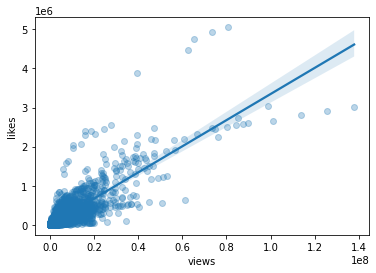

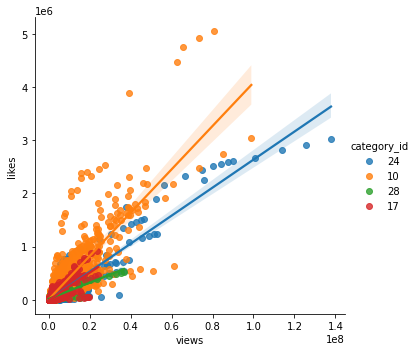

In [39]:
sns.regplot(x="views", y="likes", data=cats, scatter_kws={'alpha':0.3})
sns.lmplot(x="views", y="likes", hue="category_id", data=cats)

Other than the shape of our charts `sns.regplot()` and `sns.lmplot()` create some similar linear regressions. Thats normal as `sns.regplot()` combines `sns.regplot()` with a `FacetGrid`. This basically means with `sns.lmplot()` we can explore relationships between more than two variables.

And exploring different variables through subplots.

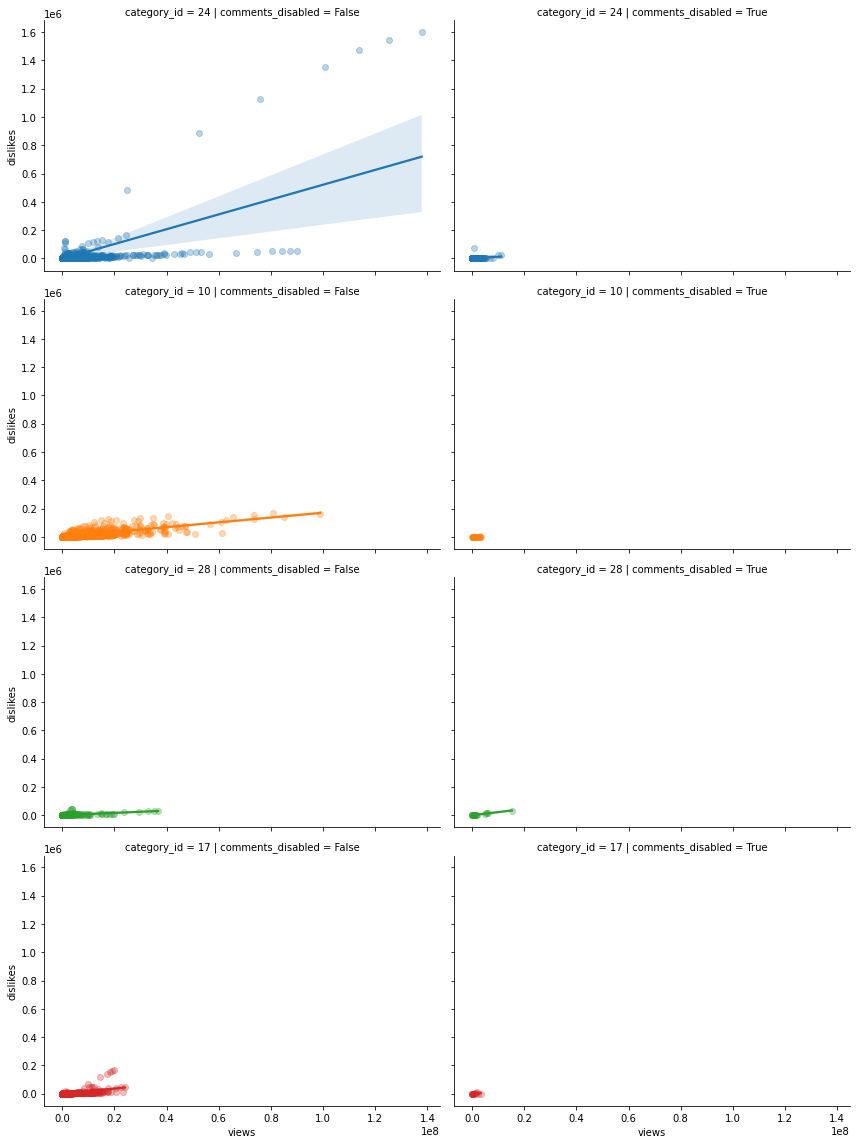

In [40]:
sns.lmplot(x="views", y="dislikes", data=cats, hue="category_id", row="category_id",col="comments_disabled", scatter_kws={'alpha':0.3}, height=4, aspect=1.5)

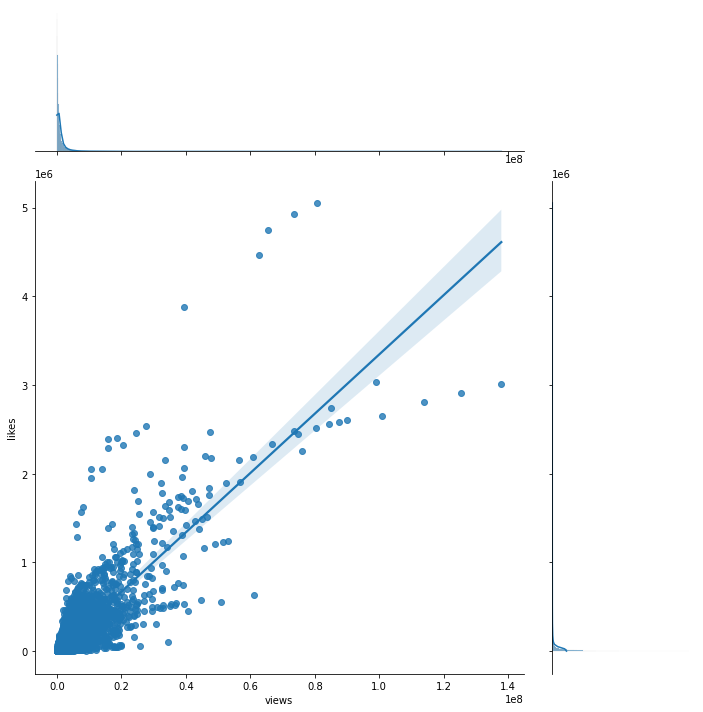

In [41]:

sns.jointplot(x="views", y="likes", data=cats, kind="reg", height=10, ratio=3) #kind: 'scatter', 'reg', 'resid', 'kde', or 'hex'


Sometimes we have data where a linear regression doesnt quite make sense though:

### Nonlinear Regressions

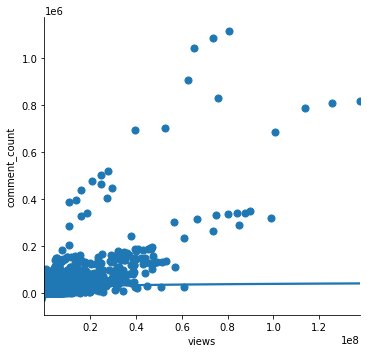

In [ ]:
# anscombe = sns.load_dataset("anscombe")
# sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), order=2)
sns.lmplot(x="views", y="comment_count", data=cats, x_estimator=np.mean, logx=True)

This concludes the lesson

        In this we went through
            The basics of filtering in Pandas
            Syntax for numpy and pandas
            Advanced dataframe creation techniques
            Beautiful vizualizations using Seaborn
            Computing Statistics in Pandas

https://seaborn.pydata.org/api.html